
```Author: Yao Gahounzo```

This program solves the 2D-diffusion problem using the continuous Galerkin (CG) method. The method is implemented with two different boundary conditions, Dirichlet, Neumann, and Robin. The CG method derivation and all the necessary mathematics are in the file [CG_method.pdf](https://github.com/yao24/SWE_2D_Diffusion/blob/main/CG_method.pdf).

This program call the module func_2D which contains all the subroutines needed in the CG method.


In [1]:
%matplotlib notebook
%pylab
from scipy.interpolate import griddata
from matplotlib import cm
#import pandas as pd
#from time import perf_counter
#from sympy import*
#import warnings
#warnings.filterwarnings('ignore')

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Call module func_2D
#from change_func import*
from module_diffusion_2D import*

In [3]:
# Domain of integration, look into func_2D module to add your own problem or initial condition

def domain(icase):
    
    
    if(icase == 1):
        ax = -1 ; bx = 1 ; coeff = 1.0
    elif(icase == 2):
        ax = 0 ; bx = 2*pi ; coeff = 1.0
        ay = 0 ; by = 2*pi
    elif(icase == 3):
        ax = -1 ; bx = 1 ; coeff = 1.0
        ay = -1 ; by = 1 
    elif(icase == 4):
        ax = -1 ; bx = 1 ; coeff = 0.01
        ay = -1 ; by = 1
    elif(icase == 5):
        ax = 0 ; bx = 3 ; coeff = 1/25
    elif(icase == 6):
        ax = 0 ; bx = 1 ; ay = 0 ; by = 1 ; coeff = 1.0
    
    print("==========================================")
    print("Problem: Diffusion")
    print("Domain: [{}, {}]".format(ax,bx)) 
    print("Diffusivity: {}".format(coeff)) 
    
    return ax, bx,ay, by, coeff

# Boundary conditions 
    
def bc_type(x_boundary,y_boundary):
    
    bound = array([x_boundary,y_boundary])
    
    sbound = ["Dirichlet", "Neumann", "Robin"]
    nbound = [5,4,8]
    
    st = ""
    
    for i in range(3):
        
        if(nbound[i] in bound):
            st += sbound[i] + " & "
            
    print("Boundary conditions: ",st)
    
    print("==========================================\n") 

In [4]:
order = array([2,3])        # polynomial order
N_element = array([8,12,16])
kstages = 4
cfl = 0.25
dt = 1e-2
Tfinal = 1

time_method = "BDF2"      # IRK, BDF2 or BDF3
integration_type = 1      # % = 1 is inexact and = 2 is exact
iplot = False             # plot the solution
icase = 2                 # select icase: 1,2,3,4

alpha = 1              
beta = -1#-1/2                  # Dirichlet: alpha = 0, beta = 1
                               # Neumann: alpha = 1, beta = 0
                               # Robin: alpha = 1, beta != 0
        
x_boundary = [4,4]    # Bottom and Top (x = -1 and x = +1)
y_boundary = [4,4]    # Left and Right (y = -1 and x = +1)

mixed = False
# Domain and diffusion coefficient

ax,bx,ay, by,c = domain(icase)
bc_type(x_boundary,y_boundary)

len_el = len(N_element)
len_pol = len(order)
l2e_norm = zeros((len_pol, len_el))
max_norm = zeros((len_pol, len_el))

Nv = N_element
    
for iN,N in enumerate(order):
    
    cfl = 0.001#1/(N+1)       # cfl number
    
    N = order[iN]
    if (integration_type == 1):
        Q = N
    elif (integration_type == 2):
        Q = N+1

    wall = 0
    

    for e, nel in enumerate(Nv):
            
        Nelx = nel; Nely = nel
        Nx = Nelx*N+1
        Ny = Nely*N+1
        Np = Nx*Ny
        Ne = Nelx*Nely
        Nbound = 2*Nx + 2*(Ny-2)
        Nside = 2*Ne + Nelx + Nely
        
        tic = perf_counter()
        
    
        qe, q,coord,intma,ntime,tf = diffusion_solver(N,Q,Ne, Np, ax, bx,ay, by, Nelx, Nely, Nx, Ny, Nbound,Nside,\
                                             icase,Tfinal,c,cfl,kstages,time_method,alpha,beta,\
                                             x_boundary,y_boundary,mixed)
        
        
        #print("\twalltime: {}".format(tf))
            
        #Compute Norm
        
        #print(abs(q-qe))
        
        top = sum((q - qe)**2)
        bot = sum(qe**2)

        e2 = sqrt(top/bot)
        
        print("\tl2_norm = {:.4e}".format(e2))
        print("\twalltime: {}".format(tf))
        
        l2e_norm[iN,e] = e2
        
        
        

Problem: Diffusion
Domain: [0, 6.283185307179586]
Diffusivity: 1.0
Boundary conditions:  Neumann & 

N = 2, nel = 64, Np = 289
	dt = 1.2330e-03
	Number of time steps = 811
	l2_norm = 3.6144e-03
	walltime: 0.5968697619999999
N = 2, nel = 144, Np = 625
	dt = 5.4825e-04
	Number of time steps = 1824
	l2_norm = 1.5508e-03
	walltime: 2.2113268980000003
N = 2, nel = 256, Np = 1089
	dt = 3.0836e-04
	Number of time steps = 3243
	l2_norm = 8.6046e-04
	walltime: 6.142448857000001
N = 3, nel = 64, Np = 625
	dt = 1.2330e-03
	Number of time steps = 811
	l2_norm = 3.4480e-03
	walltime: 1.1881272450000004
N = 3, nel = 144, Np = 1369
	dt = 5.4825e-04
	Number of time steps = 1824
	l2_norm = 1.5166e-03
	walltime: 4.592855668999999
N = 3, nel = 256, Np = 2401
	dt = 3.0836e-04
	Number of time steps = 3243
	l2_norm = 8.4827e-04
	walltime: 17.858134625


In [5]:
xmin = min(coord[:,0])
xmax = max(coord[:,0])
ymin = min(coord[:,1])
ymax = max(coord[:,1])
xe = coord[:,0]
ye = coord[:,1]
nx = 200
ny = 200
dx = (xmax-xmin)/nx
dy = (ymax-ymin)/ny
x1 = arange(xmin,xmax+dx,dx)
y1 = arange(ymin,ymax+dy,dy)
xi,yi = meshgrid(x1,y1)

<IPython.core.display.Javascript object>


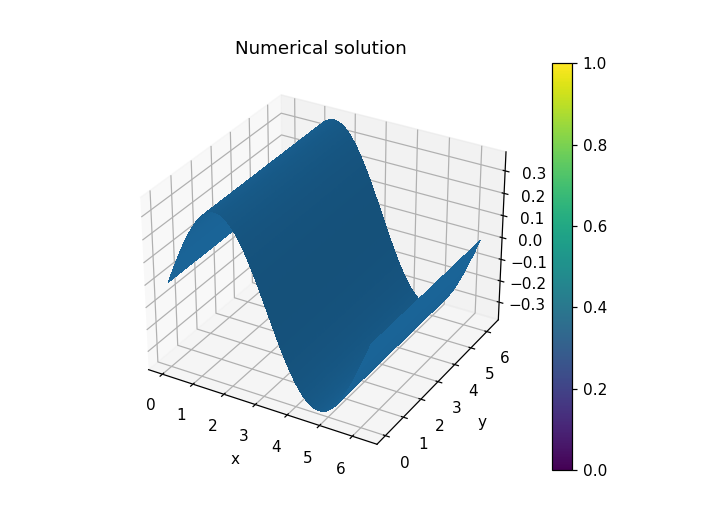

In [6]:
q_2d = griddata((xe,ye),q,(xi,yi), method='cubic')

fig = figure(1)
fx = fig.add_subplot(111, projection='3d')
surf = fx.plot_surface(xi,yi,q_2d,rstride = 1, cstride = 1,antialiased=False)
fig.colorbar(surf)

title("Numerical solution")
xlabel("x")
ylabel("y")

show()

<IPython.core.display.Javascript object>


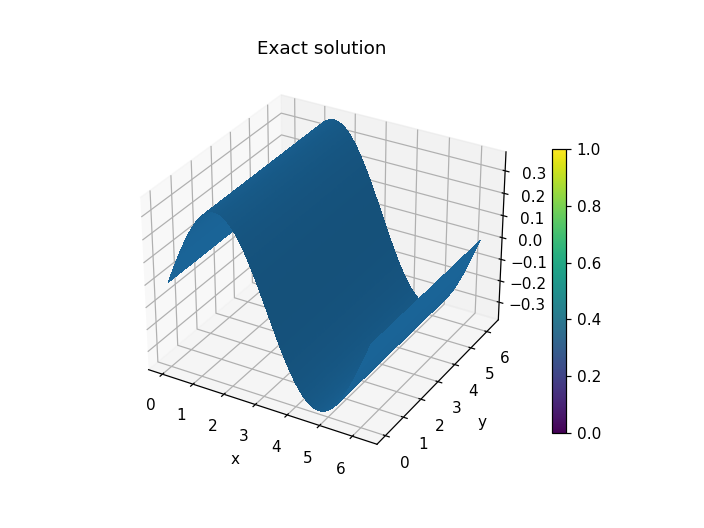

In [7]:
qe_2d = griddata((xe,ye),qe,(xi,yi), method='cubic')

fig = figure(3)
fx = fig.add_subplot(111, projection='3d')
surf = fx.plot_surface(xi,yi,qe_2d,rstride = 1, cstride = 1,antialiased=False)
fig.colorbar(surf,anchor=(0, 0.3), shrink=0.7)
title("Exact solution")
xlabel("x")
ylabel("y")
show()

<IPython.core.display.Javascript object>


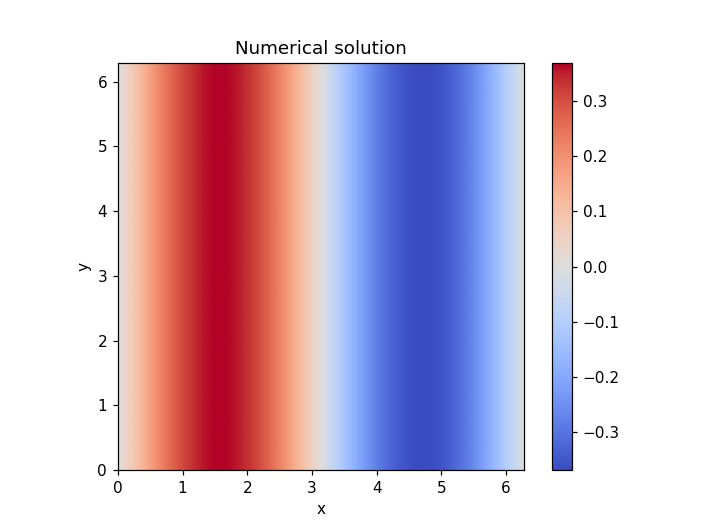

In [8]:
figure(4)
imshow(q_2d, extent=[ax, bx, ax, bx],origin='lower',cmap=cm.coolwarm)
colorbar()
clim(q.min(), q.max())
title("Numerical solution")
xlabel("x")
ylabel("y")
show()

In [9]:
print("min_q  = ",q.min())
print("min_qe = ",qe.min())

print("\nmax_q  = ",q.max())
print("max_qe = ",qe.max())

min_q  =  -0.36811329159633693
min_qe =  -0.3678794411714212

max_q  =  0.368113291596401
max_qe =  0.3678794411714212


<IPython.core.display.Javascript object>


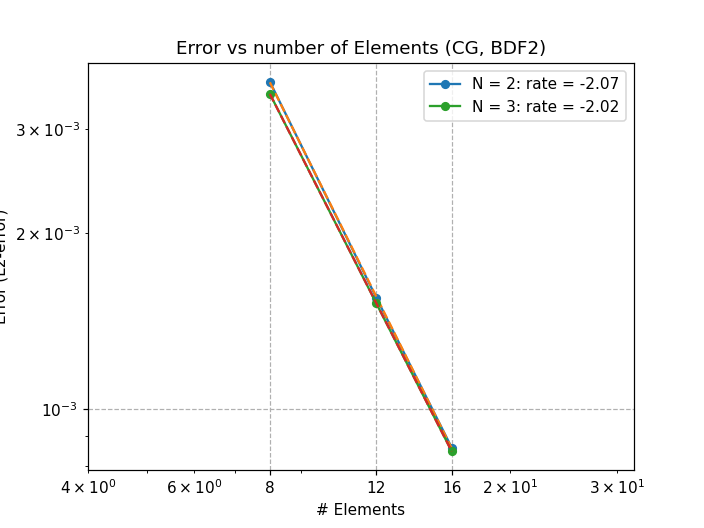

In [10]:
import cg_graphics           # import cg_graphics module

figure(5)
clf()

for i,N in enumerate(order):

    if(N >= 2):
        p = polyfit(log(Nv[:3]), log(l2e_norm[i][:3]), 1)
    else:

        p = polyfit(log(Nv), log(l2e_norm[i]), 1)

    loglog(Nv, l2e_norm[i], '-o',markersize=5, label = 'N = {:d}: rate = {:.2f}'.format(N,p[0]))

    loglog(Nv, exp(polyval(p,log(Nv))), '--')

cg_graphics.set_xticks(Nv)
xlabel('# Elements')
ylabel('Error (L2-error)')
title('Error vs number of Elements ({:s}, {:s})'.format('cg'.upper(), time_method))
grid(axis='both',linestyle='--')
legend()
show()